<a href="https://colab.research.google.com/github/hitomitsu50/Sports_data_portfolio_MLB_Statcast/blob/main/2025%E5%B9%B4Statcast%E3%82%AB%E3%83%BC%E3%83%96%E3%81%AE%EF%BC%92%E7%A8%AE%E9%A1%9E%E3%81%AE%E8%90%BD%E5%B7%AETop10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ライブラリーのインストール
!pip install pybaseball japanize_matplotlib
!sudo apt-get -y update
!sudo apt-get -y install fonts-ipaexfont

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 49.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.7/432.7 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 76.1 MB/s eta 0:00:00
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=2fc62bd7ae4ec3852d5aef4db691ff273603f22b7a5daa43bedb151f2fbacd4f
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize_matplotlib
Get:1 https://cli.github.com/packages stable InRelease [3,917 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubu

In [ ]:
#ライブラリのインポート
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
import time
import glob
from pybaseball import statcast

In [ ]:
#データの読み込みと結合
#ファイル名パターンに一致するＣＳＶを取得
csv_files_pattern="sample_data/statcast_*.csv"
csv_files=glob.glob(csv_files_pattern)

In [ ]:
#ＣＳＶファイルを読み込み リストに格納
dfs=[]
for file in csv_files:
  try:
    df_month=pd.read_csv(file)
    dfs.append(df_month)
    print(f"{file}を読み込みました。")
  except Exception as e:
    print(f"{file}の読み込み中にエラーが発生:{e}")

sample_data/statcast_2025-05-01-2025-05-31.csvを読み込みました。
sample_data/statcast_2025-03-18-2025-03-31.csvを読み込みました。
sample_data/statcast_2025-06-01-2025-06-30.csvを読み込みました。
sample_data/statcast_2025-09-01-2025-09-28.csvを読み込みました。
sample_data/statcast_2025-08-01-2025-08-31.csvを読み込みました。
sample_data/statcast_2025-04-01-2025-04-30.csvを読み込みました。
sample_data/statcast_2025-07-01-2025-07-31.csvを読み込みました。


In [ ]:
#全てのデータフレームを結合
if dfs:
  df_combined=pd.concat(dfs, ignore_index=True)
  df=df_combined
  print("全てのデータフレームを結合しました。")
  display(df.head())
  print(f"結合後の行数: {len(df)}")
else:
  print("読み込めるＣＳＶファイルが見つかりませんでした。")

全てのデータフレームを結合しました。


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,FF,2025-05-31,95.7,-1.82,5.28,"Montero, Rafael",691785,606160,field_out,hit_into_play,...,1.0,1.32,0.83,-0.83,36.6,0.139455,-10.166076,40.209810,39.021897,28.779218
1,FS,2025-05-31,87.9,-1.66,5.06,"Montero, Rafael",691785,606160,NaN,foul,...,1.0,2.42,1.08,-1.08,39.2,13.728831,-2.543747,31.022651,49.545197,32.569171
2,FS,2025-05-31,88.6,-1.62,4.99,"Montero, Rafael",691785,606160,NaN,foul,...,1.0,2.70,1.16,-1.16,28.3,9.811060,4.873316,28.523588,45.344786,27.334223
3,SL,2025-05-31,81.7,-1.48,5.14,"Montero, Rafael",665966,606160,field_out,hit_into_play,...,2.0,3.38,-0.65,-0.65,36.6,22.202492,-19.609687,30.555638,38.268162,49.913181
4,FF,2025-05-31,96.3,-1.50,5.32,"Montero, Rafael",665966,606160,NaN,foul,...,2.0,1.25,0.83,0.83,34.7,1.653196,18.485025,27.030027,35.922657,23.587106


結合後の行数: 742080


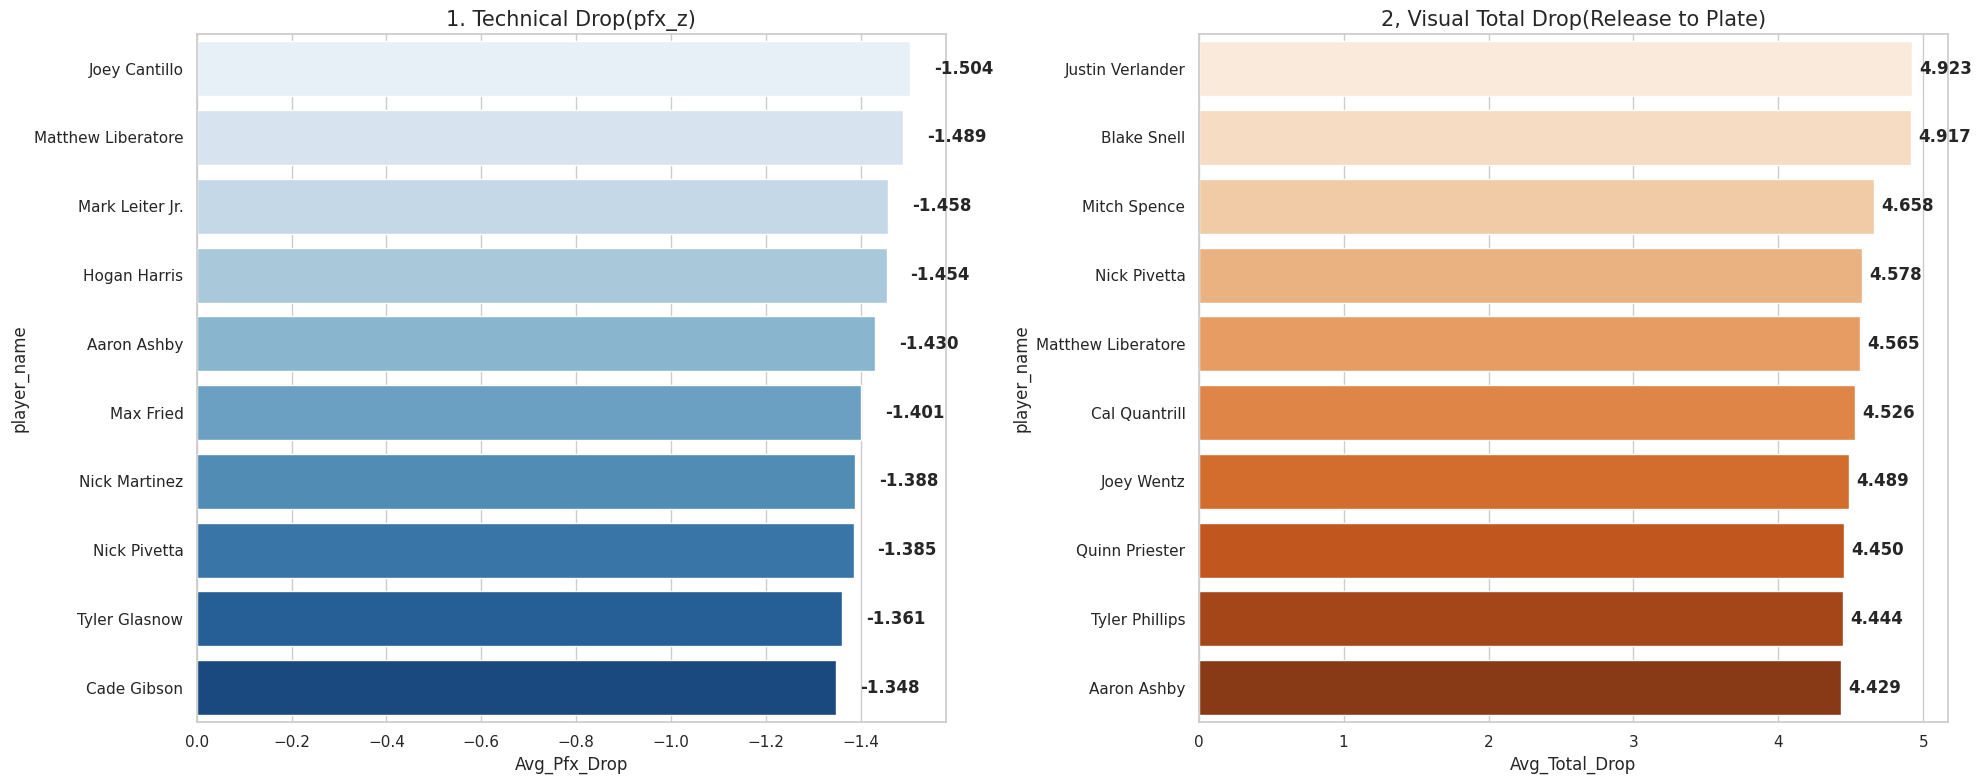

In [ ]:
#データの準備
df_cu=df[df["pitch_type"]=="CU"].copy()

#実戦球(ストライク・スイング)に規定
valid_descriptions=["strike","called_strike","swinging_strike","foul","foul_tip",
                    "in_play","hit_into_play","swinging_strike_blocked"]
df_cu=df_cu[df_cu["description"].isin(valid_descriptions)]

# 名前の整形（名 姓 / カンマなし）
def format_name(name):
  if "," in name:
    last, first= name.split(",")
    return f"{first.strip()} {last.strip()}"
  return name
df_cu["player_name"]=df_cu["player_name"].apply(format_name)

#2. 指標の計算
#A: 技術的な落差(pfx_z)
#B: 物理的な高低差(リリース高い-捕球高)
df_cu["total_drop"]=df_cu["release_pos_z"]-df_cu["plate_z"]

#投手ごとの集計
stats=df_cu.groupby("player_name").agg(
    Avg_Pfx_Drop=("pfx_z","mean"),
    Avg_Total_Drop=("total_drop","mean"),
    Pitch_Count=("pfx_z", "count")
).reset_index()

#100球以上の投手に限定
stats_filtered=stats[stats["Pitch_Count"]>=100]

#3. 可視化(2つのグラフを並べる)
fig, (ax1,ax2)=plt.subplots(1, 2, figsize=(20, 8))
sns.set_theme(style="whitegrid")

# --- グラフ1: 技術的変化量(pfx_z) ---
top_10_pfx=stats_filtered.sort_values(by="Avg_Pfx_Drop", ascending=True).head(10)
plot1=sns.barplot(data=top_10_pfx, x="Avg_Pfx_Drop",y="player_name",ax=ax1,palette="Blues",
                  hue="player_name",legend=False)
ax1.set_title("1. Technical Drop(pfx_z)",fontsize=15)
ax1.invert_xaxis() #マイナス値を右に伸ばす
for p in plot1.patches:
  ax1.text(p.get_width() - 0.05, p.get_y() + p.get_height()/2, f"{p.get_width():.3f}",va="center",
           fontweight="bold")
# --- グラフ2: 物理的高低差 (Total Drop) ---
top_10_total=stats_filtered.sort_values(by="Avg_Total_Drop", ascending=False).head(10)
plot2=sns.barplot(data=top_10_total, x="Avg_Total_Drop",y="player_name",ax=ax2, palette="Oranges",
                  hue="player_name",legend=False)
ax2.set_title("2, Visual Total Drop(Release to Plate)", fontsize=15)
for p in plot2.patches:
  ax2.text(p.get_width() + 0.05,p.get_y() + p.get_height()/2, f"{p.get_width():.3f}",va="center",
           fontweight="bold")
plt.tight_layout()
plt.show()

In [ ]:
# --- データの表示用 （Gemini共有用）
#1. 技術的落差(pfx_z)のTOP10
print("[1. 技術的落差(pfz_z) TOP10]")
top_10_pfx_df=stats_filtered.sort_values(by="Avg_Pfx_Drop",ascending=True).head(10)
#列名を分かりやすくして表示
print(top_10_pfx_df[["player_name", "Avg_Pfx_Drop","Pitch_Count"]].to_string(index=False))

print("\n" + "="*50 + "\n")

#2. 物理的高低差(Total Drop)のTOP10
print("[2. 視覚的トータル・ドロップ TOP10]")
top_10_total_df=stats_filtered.sort_values(by="Avg_Total_Drop",ascending=False).head(10)
#列名を分かりやすくして表示
print(top_10_total_df[["player_name", "Avg_Total_Drop", "Pitch_Count"]].to_string(index=False))

[1. 技術的落差(pfz_z) TOP10]
       player_name  Avg_Pfx_Drop  Pitch_Count
     Joey Cantillo     -1.504000          190
Matthew Liberatore     -1.489495          218
   Mark Leiter Jr.     -1.457934          121
      Hogan Harris     -1.454403          159
       Aaron Ashby     -1.430467          150
         Max Fried     -1.400805          323
     Nick Martinez     -1.388089          157
      Nick Pivetta     -1.385343          423
     Tyler Glasnow     -1.361044          182
       Cade Gibson     -1.348176          159


[2. 視覚的トータル・ドロップ TOP10]
       player_name  Avg_Total_Drop  Pitch_Count
  Justin Verlander        4.923098          255
       Blake Snell        4.917063          126
      Mitch Spence        4.657959          147
      Nick Pivetta        4.577683          423
Matthew Liberatore        4.564817          218
     Cal Quantrill        4.526143          140
        Joey Wentz        4.489312          189
    Quinn Priester        4.449924          132
    Tyler Ph